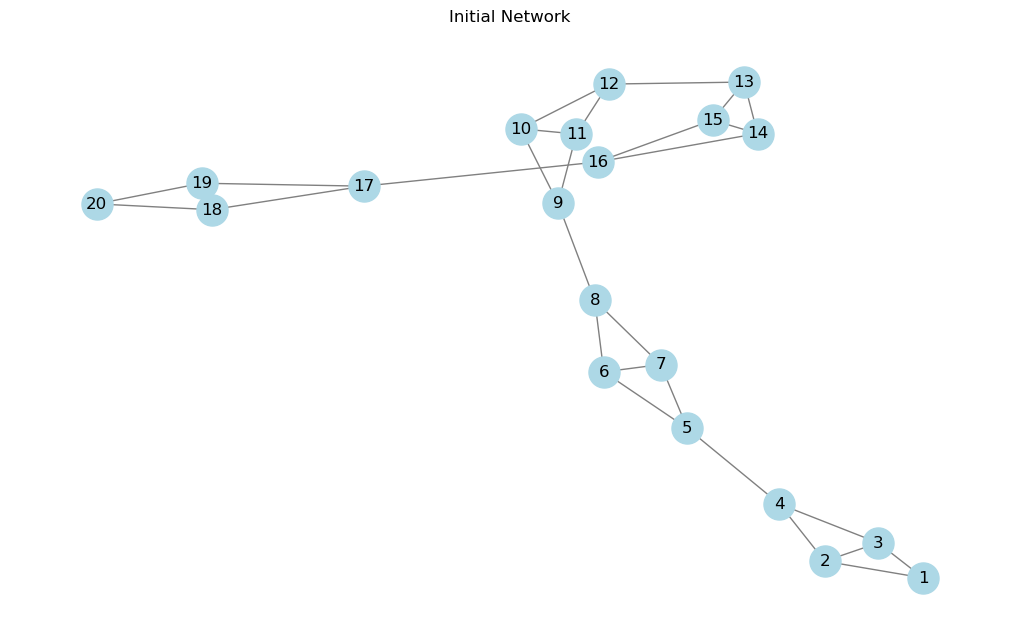

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.sparse.linalg import eigsh

# Create a synthetic dataset
nodes = np.arange(1, 21)
edges = [
    (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5),
    (5, 6), (5, 7), (6, 7), (6, 8), (7, 8), (8, 9),
    (9, 10), (9, 11), (10, 11), (10, 12), (11, 12),
    (12, 13), (13, 14), (13, 15), (14, 15), (14, 16),
    (15, 16), (16, 17), (17, 18), (17, 19), (18, 19), (18, 20), (19, 20)
]

# Create a graph
G = nx.Graph()
G.add_edges_from(edges)

# Plot the initial network
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
plt.title('Initial Network')
plt.show()


In [2]:
# Compute the Laplacian matrix
L = nx.laplacian_matrix(G).astype(float).toarray()

# Compute the eigenvalues and eigenvectors
k = 5  # Number of clusters
eigenvalues, eigenvectors = eigsh(L, k=k+1, which='SM')

# Use eigenvectors corresponding to the smallest non-zero eigenvalues for clustering
X = eigenvectors[:, 1:k+1]

# Perform KMeans clustering on the eigenvectors
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
clusters = kmeans.labels_

# Assign cluster labels to nodes
nx.set_node_attributes(G, {node: {'cluster': clusters[i]} for i, node in enumerate(G.nodes())})


C:\Users\Dharini U\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dharini U\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


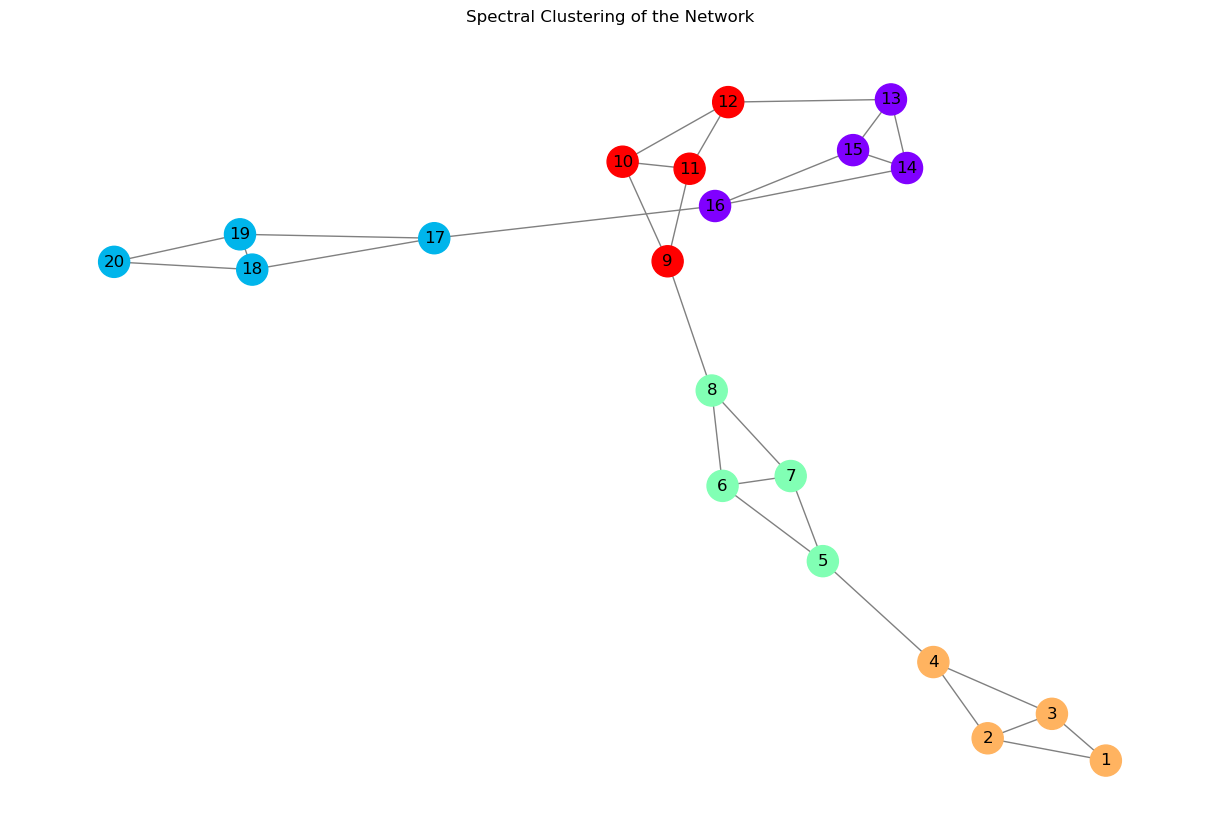

In [3]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
node_color = [G.nodes[node]['cluster'] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_color, cmap=plt.cm.rainbow, edge_color='gray')
plt.title('Spectral Clustering of the Network')
plt.show()


In [4]:
# Display clusters
for cluster_id in range(k):
    print(f"Cluster {cluster_id}:")
    nodes_in_cluster = [node for node in G.nodes() if G.nodes[node]['cluster'] == cluster_id]
    print(nodes_in_cluster)


Cluster 0:
[13, 14, 15, 16]
Cluster 1:
[17, 18, 19, 20]
Cluster 2:
[5, 6, 7, 8]
Cluster 3:
[1, 2, 3, 4]
Cluster 4:
[9, 10, 11, 12]
